In [ ]:
# working on  data from an app to determine behavior

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 

# dataset 
dataset = pd.read_csv('churn_data.csv')
# Users who spent 60 enrolled and , unfollow/ churn in the next 30


In [3]:
### EDA process ###

dataset.head()

#dataset.columns
# to see the distribution of our columns/ variables 
dataset.describe()

## cleaning the data 

# first thing : removing the no values 
dataset.isna().any()

# now we need to check how many "no values" we have in each column to see what 
# procedure to do 

dataset.isna().sum()



user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [4]:
# credit_score has too many : better to remove the column 
# age on the other hand has only 4 : so we only need to remove rows 
 
dataset=dataset[pd.notnull(dataset['age'])] # we remove the 4 rows 

# now we are going to remove the two columns that have too many na 

dataset = dataset.drop(columns=['credit_score','rewards_earned'])

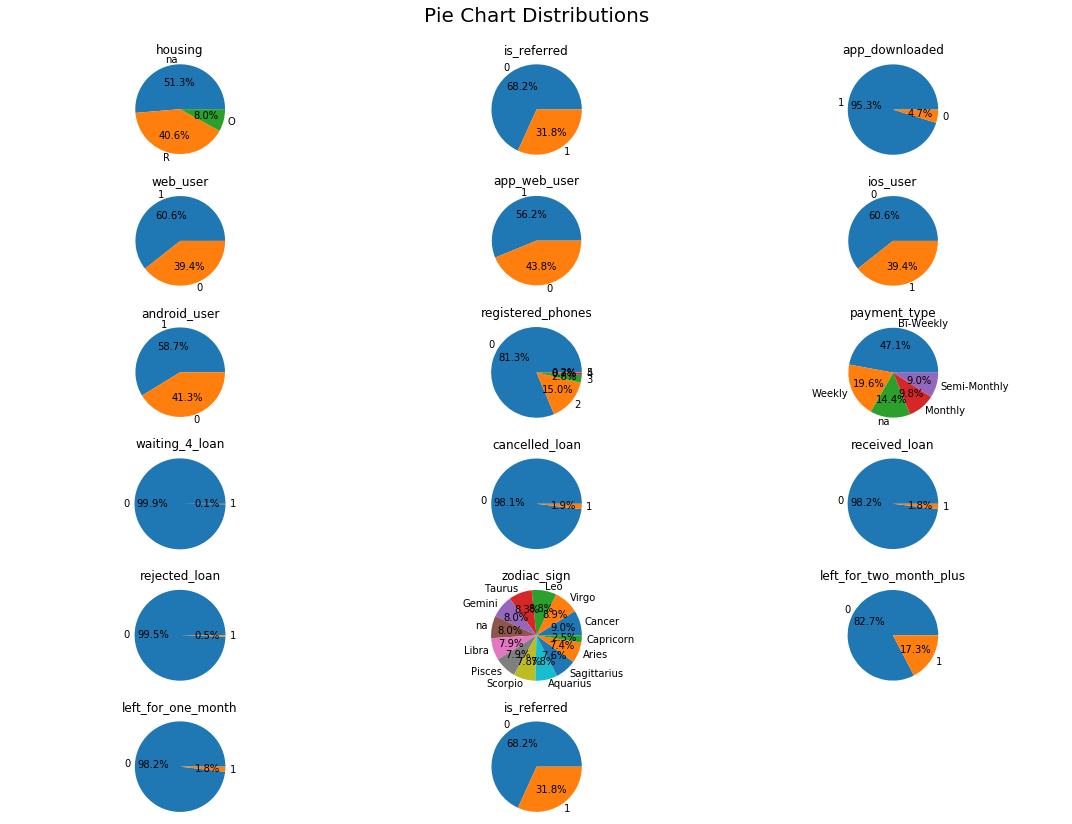

In [5]:

## Pie Plots
# first we create a dataset that contains only the binary columns 
# same code used in a histgram is used here as well
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20) # name of the pie chart
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
   
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values # normalize gives us perecentages 
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%') # here we use plt.pie instead of plt.hist
    plt.axis('equal') # the equal helps remove showing the axis  # the auto_pc , specifiy how we want to display the pie. we want to be displayed as a float with just decimal
fig.tight_layout(rect=[0, 0.03, 1, 0.95])


In [13]:
# the columns such reject_loan , wait_for_one_month ... have a very small percentage and a dominent one 
# this can affect our model  and therefore the  prediction 
#  we need to make sure that these columns or independent variables are useful
# if not we will remove them 

# now we are going to see in those variables how many of them have a churn value
# meaning are they helpful with predicting the churn 
# int he waiting for loan variable how many have the value 1 in churn
dataset[dataset2.waiting_4_loan ==1].churn.value_counts() # 8 rows with 1 and 27 zeros
dataset[dataset2.cancelled_loan ==1].churn.value_counts()
dataset[dataset2.received_loan ==1].churn.value_counts() # 292 (1) - 199
dataset[dataset2.rejected_loan ==1].churn.value_counts() #107(1)-25
dataset[dataset2.left_for_one_month ==1].churn.value_counts()  # balanced ditribution 266 - 222

1    266
0    222
Name: churn, dtype: int64

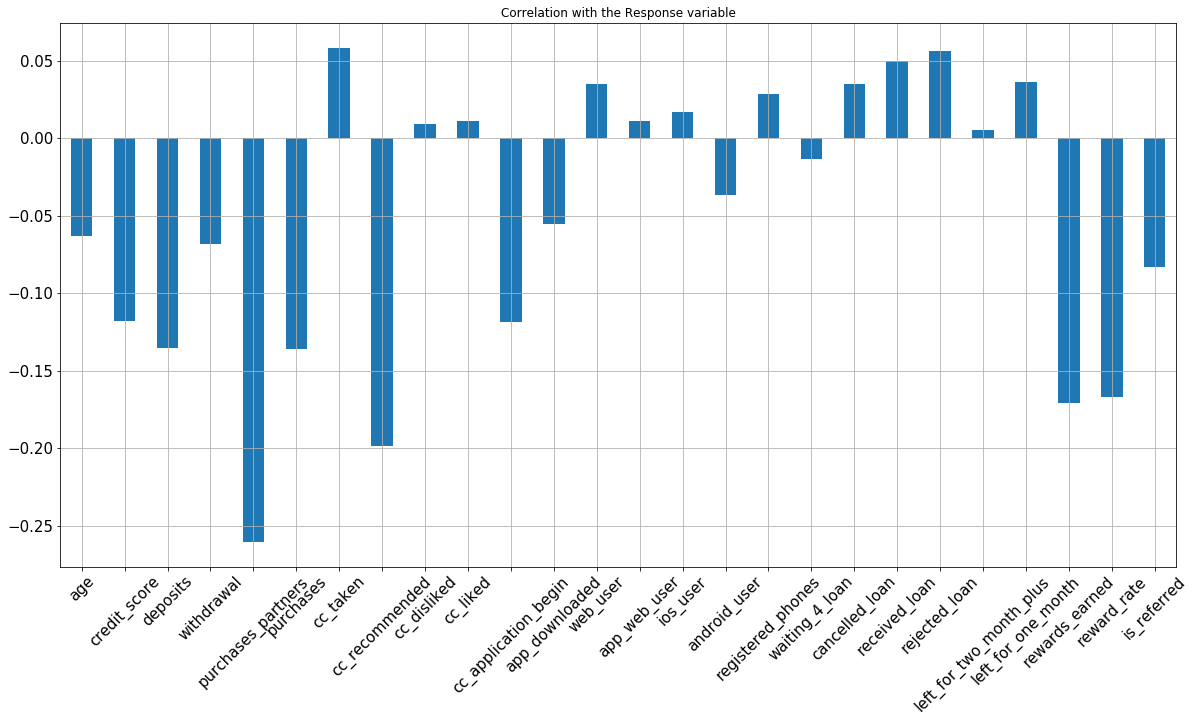

In [6]:
# correlation 
# now we want to determine which variables are better suited to help us predict
#  now we are going to create a dataset that contains the numerical variables 
# meaning we are going to remove the response variable which is the churn
# we also going to remove the categorical variable 

dataset.drop(columns=['churn','user','housing','payment_type','zodiac_sign']).corrwith(dataset.churn).plot.bar(
figsize=(20,10),title='Correlation with the Response variable', fontsize=15,rot =45,grid=True)


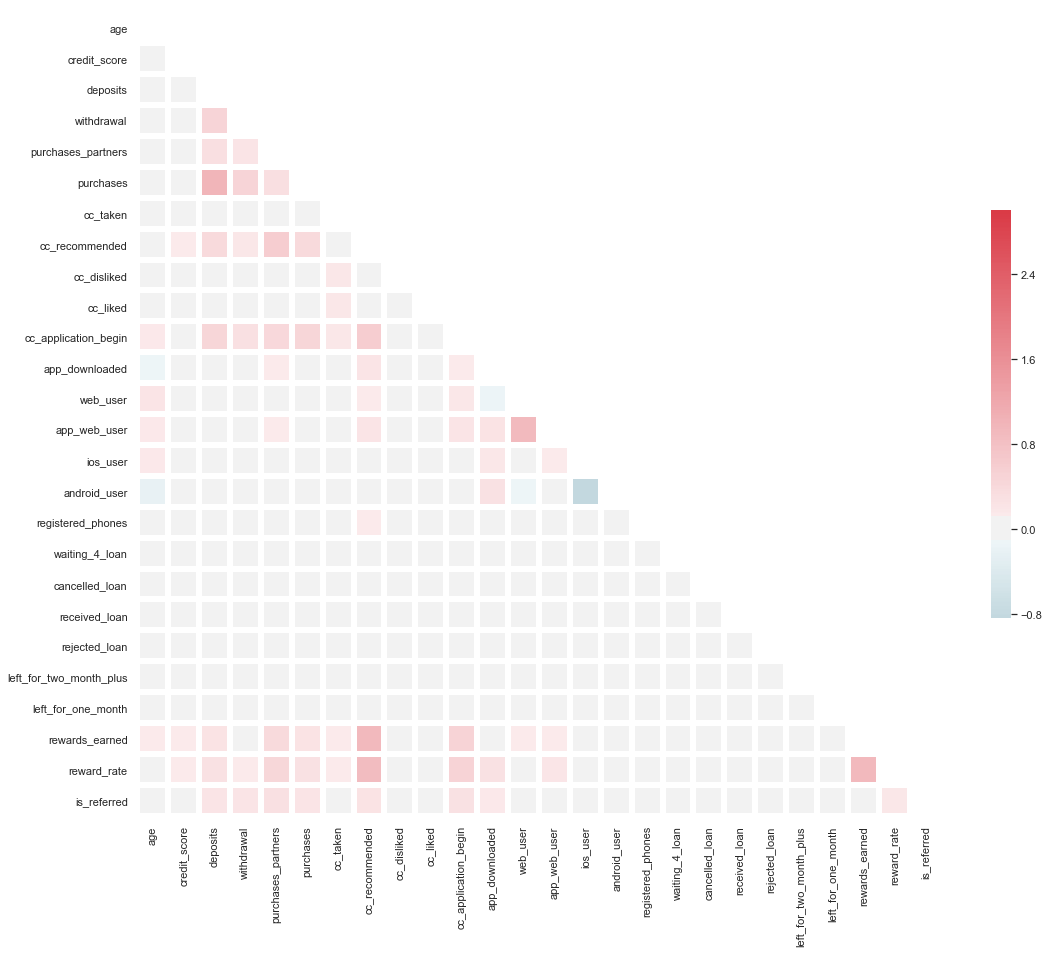

In [9]:
# correlation matrix 
# we are going to see the correlation of the variables with each other 
# we do that , because we do not want to have variables that are strongly correlated 

sn.set(style="white")

# compute the correlation matrix 
corr = dataset.drop(columns=['user','churn']).corr()

# Generate a mask for the upper triangle
mask =np.zeros_like(corr, dtype=np.bool) # symetrie , so we dont need the upper end 
mask[np.triu_indices_from(mask)]=True

# Set up the matplotlib figure
f, ax= plt.subplots(figsize=(18,15))

# Generate a custom diverging colormap
cmap=sn.diverging_palette(220,10,as_cmap=True)

#Draw the heatmap with the mask and correct aspect ration
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=3,center=0,square=True, linewidths=5,cbar_kws={"shrink":.5})

In [10]:
# we notice that there is a strong negative  correlation btwn ios user and android user 
# now this one need to be removed 

# another thing to notice is that app web users is a variable that sums up two other variables meaning 
# that it is strongly correlated and that it is not a independent variable 

# so we are going to remove it 
dataset=dataset.drop(columns=['app_web_user'])
dataset.to_csv('new_churn_data1.csv',index=False) # saving our results  
